In [5]:
import numpy as np


# Function to generate random patterns and labels
def generate_random_data(num_samples, num_features):
    # X = np.random.randint(0, 2, (num_samples, num_features))  # Random binary patterns
    X = np.random.rand(num_samples, num_features)
    y = np.random.choice([-1, 1], num_samples)  # Random binary labels (-1 or 1)
    return X, y


# Perceptron model
class Perceptron:
    def __init__(self, num_features, learning_rate=0.1, max_epochs=500):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = num_features * 30  # max_epochs

    def predict(self, x):
        return 1 if np.dot(x, self.weights) + self.bias >= 0 else -1

    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if target != prediction:
                    # Update weights and bias
                    update = self.learning_rate * target
                    self.weights += update * xi
                    # sign constrained
                    self.weights[self.weights < 0] = 0
                    self.bias += update
                    errors += 1
            # Stop if no errors in epoch (converged)
            if errors == 0:
                # print(f"Converged after {epoch + 1} epochs")
                break
        else:
            # print("Reached maximum epochs without full convergence")
            pass

    def score(self, X, y):
        predictions = [self.predict(xi) for xi in X]
        accuracy = np.mean(predictions == y)
        return accuracy


# Parameters
num_samples = 10  # Number of random patterns
num_features = 10  # Number of features per pattern

# Generate random data
X, y = generate_random_data(num_samples, num_features)

# Initialize Perceptron and train
perceptron = Perceptron(num_features=num_features, learning_rate=0.1, max_epochs=100)
perceptron.fit(X, y)

# Evaluate performance
accuracy = perceptron.score(X, y)
print(f"Accuracy on random data: {accuracy * 100:.2f}%")


Accuracy on random data: 100.00%


In [6]:
class TrainPerceptron:
    def __init__(self, num_samples, num_features):
        self.num_samples = num_samples
        self.num_features = num_features
        self.perceptron = Perceptron(
            num_features=num_features, learning_rate=0.1, max_epochs=100
        )

    def train(self):
        X, y = generate_random_data(self.num_samples, self.num_features)
        self.perceptron.fit(X, y)
        return self.perceptron.score(X, y)


repeat = 10
average_accuracy = []
for _ in range(repeat):
    train_perceptron = TrainPerceptron(num_samples=20, num_features=10)
    accuracy = train_perceptron.train()
    average_accuracy.append((accuracy == 1))
print(f"Average accuracy: {np.mean(average_accuracy) * 100:.2f}%")


Average accuracy: 0.00%


In [7]:
def get_success_rate(num_samples=20, num_features=10, repeat=20):
    average_accuracy = []
    for _ in range(repeat):
        train_perceptron = TrainPerceptron(
            num_samples=num_samples, num_features=num_features
        )
        accuracy = train_perceptron.train()
        # print(accuracy)
        average_accuracy.append((accuracy == 1))
    # print(average_accuracy)
    return np.mean(average_accuracy), np.std(average_accuracy) / np.sqrt(repeat)


N, P = 20, 30

print(
    "N = {}, P = {}, success rate = {}".format(
        N, P, get_success_rate(num_samples=P, num_features=N)[0]
    )
)


N = 20, P = 30, success rate = 0.0


In [8]:
# plot capacity
from collections import defaultdict

capacity = defaultdict(list)
for N in [10, 20, 50, 100, 200, 400, 500, 600, 800, 1000]:
    print("------------------------")
    if N < 200:
        min_N, max_N, step = int(N * 0.6), int(N * 1.4), int(N * 0.1)
    else:
        min_N, max_N, step = int(N * 0.7), int(N * 1.1), int(N * 0.2)
    for P in range(min_N, max_N, step):
        ave_success_rate, std_success_rate = get_success_rate(
            num_samples=P, num_features=N
        )
        print("N = {}, P = {}, success rate = {}".format(N, P, ave_success_rate))

        capacity[N].append((P, ave_success_rate, std_success_rate))

print(capacity)


------------------------
N = 10, P = 6, success rate = 0.8
N = 10, P = 7, success rate = 0.85
N = 10, P = 8, success rate = 0.7
N = 10, P = 9, success rate = 0.65
N = 10, P = 10, success rate = 0.5
N = 10, P = 11, success rate = 0.4
N = 10, P = 12, success rate = 0.3
N = 10, P = 13, success rate = 0.4
------------------------
N = 20, P = 12, success rate = 0.8
N = 20, P = 14, success rate = 0.85
N = 20, P = 16, success rate = 0.75
N = 20, P = 18, success rate = 0.45
N = 20, P = 20, success rate = 0.35
N = 20, P = 22, success rate = 0.2
N = 20, P = 24, success rate = 0.05
N = 20, P = 26, success rate = 0.05
------------------------
N = 50, P = 30, success rate = 0.95
N = 50, P = 35, success rate = 0.85
N = 50, P = 40, success rate = 0.45
N = 50, P = 45, success rate = 0.55
N = 50, P = 50, success rate = 0.05
N = 50, P = 55, success rate = 0.1
N = 50, P = 60, success rate = 0.0
N = 50, P = 65, success rate = 0.05
------------------------
N = 100, P = 60, success rate = 1.0
N = 100, P = 7

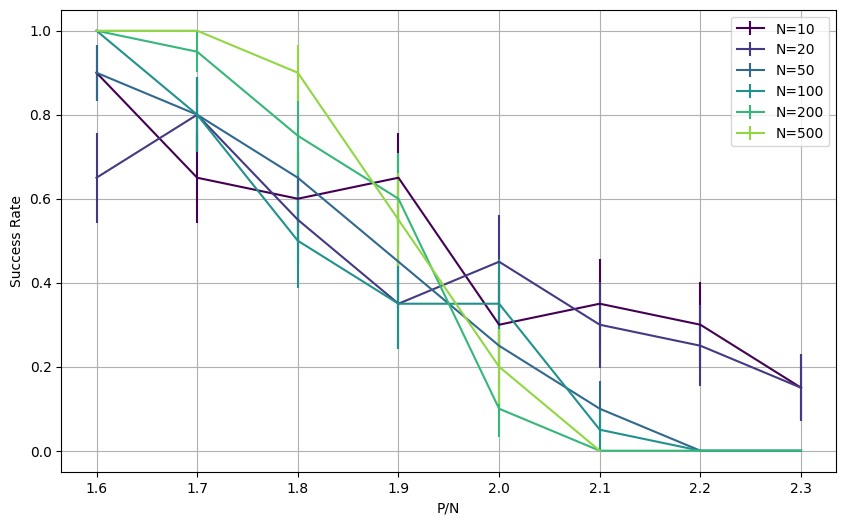

In [ ]:
# plot capacity
import matplotlib.pyplot as plt

# Create color map
cmap = plt.cm.viridis  # or any other colormap
N_values = list(capacity.keys())
colors = {N: cmap(i / len(N_values)) for i, N in enumerate(N_values)}

plt.figure(figsize=(10, 6))
for N in capacity:
    P, ave_success_rate, std_success_rate = zip(*capacity[N])
    plt.errorbar(
        [p / N for p in P],
        ave_success_rate,
        yerr=std_success_rate,
        label=f"N={N}",
        color=colors[N],
    )
plt.legend()
plt.xlabel("P/N")
plt.ylabel("Success Rate")
plt.grid(True)
plt.savefig("perceptron_capacity_uniform_input.pdf", dpi=300)
plt.show()


In [ ]:
capacity

defaultdict(list,
            {10: [(0.85, 0.07984359711335655),
              (0.8, 0.08944271909999159),
              (0.7, 0.10246950765959596),
              (0.45, 0.11124297730643495),
              (0.45, 0.11124297730643494),
              (0.5, 0.11180339887498948),
              (0.25, 0.09682458365518541),
              (0.2, 0.0894427190999916),
              (0.3, 0.10246950765959596),
              (0.2, 0.0894427190999916)],
             20: [(0.9, 0.0670820393249937),
              (0.65, 0.1066536450385077),
              (0.7, 0.10246950765959596),
              (0.6, 0.10954451150103323),
              (0.5, 0.11180339887498948),
              (0.4, 0.10954451150103323),
              (0.2, 0.0894427190999916),
              (0.15, 0.07984359711335655),
              (0.25, 0.09682458365518541),
              (0.0, 0.0)],
             50: [(0.95, 0.04873397172404481),
              (0.85, 0.07984359711335655),
              (0.8, 0.08944271909999159),
              